# Latihan Queue Stack (word)

Modifikasilah class queue yang diberikan untuk bisa mengerjakan aplikasi berikut:
1.   Queue akan menyimpan data object berisi nama barang (string) dan tanggal expired (datetime module)
2.   Aplikasi mempunyai menu untuk:
      *   Menambah data (data nama barang dan tanggal expired). Tidak perlu ada pengecekan terhadap tanggal, diasumsikan user menginputkan data dengan tanggal yang urut. (Isi queue urut berdasarkan tanggalnya)
      *   Fungsi untuk mengganti hari. Misal hari ini + 30 hari maka tanggal saat ini menjadi +30 hari. Asumsikan tanggal pertama kali adalah 26 September 2024.
      *   Fungsi menghapus data barang yang sudah expired. Data pada queue yang tanggal expired nya sebelum atau sama dengan hari ini, di dequeue.


In [ ]:
import datetime

class Node:
  def __init__(self, item, thn, bln, tgl):
    self.item = item
    self.date = datetime.date(thn, bln, tgl)
    self.next = None
    self.prev = None

class Queue:
  def __init__(self):
    self.front = None
    self.back = None
    self.counter = 0

  def enqueue(self, item, thn, bln, tgl):
    new_node = Node(item, thn, bln, tgl)
    if self.front == None:
      self.front = new_node
      self.back = new_node
    else:
      self.back.next = new_node
      new_node.prev = self.back
      self.back = new_node
    self.counter += 1

  def dequeue(self, index):
    temp = self.front
    if index == 1:
      self.front = temp.next
    else:
      for i in range(index-1):
        temp = temp.next
      after = temp.next
      before = temp.prev
      if after != None:
        after.prev = before
      if before != None:
        before.next = after
    self.counter -= 1

  def print_queue(self):
    temp = self.front
    for i in range(self.counter):
      while temp != None:
        print(temp.item, temp.date)
        temp = temp.next

  def hapusExpired(self, expiry_date):
    temp = self.front
    index = 1
    while temp != None:
      if temp.date <= expiry_date:
        self.dequeue(index)
      else:
        index += 1
      temp = temp.next

def SetExpiryDate(jml):
  return today + datetime.timedelta(days=jml)



q = Queue()
x = q.enqueue("Indomie",2024,9,26)
x = q.enqueue("Samyang",2024,9,28)
x = q.enqueue("Momofuku",2024,10,3)
x = q.enqueue("Ichiran",2024,10,6)
x = q.enqueue("Nongshim",2024,10,15)
q.print_queue()
print('==============================================================')

today = datetime.date(2024,9,26)    # set tanggal hari ini 26 Sept 2024
expiry_date = SetExpiryDate(6)       # set expiry date = 6 hari setelah 26 Sept 2024
print("Expiry Date = ", expiry_date)

q.hapusExpired(expiry_date)
q.print_queue()

Indomie 2024-09-26
Samyang 2024-09-28
Momofuku 2024-10-03
Ichiran 2024-10-06
Nongshim 2024-10-15
Expiry Date =  2024-10-06
Nongshim 2024-10-15


Buatlah program untuk sebuah sistem kalkulator (seperti app Calculator). Inputan akan bisa terus menerus diketikkan. Jika diketikkan angka/operator (“+”, “-“, “*”, “/”) maka akan langsung melakukan proses perhitungan sementara dari yang sudah diinputkan sebelumnya. Jika diinputkan char lainnya maka muncul tulisan error. Hasil perhitungan sementara dihitung berdasarkan tingkatan operasinya. “*” dan “/” lebih tinggi daripada “+” dan “-“. Jika operator memiliki level yang lebih tinggi, maka akan dioperasikan terlebih dahulu dari operator yang lebih rendah. Jika level operator sama, maka yang diinputkan lebih dahulu dikerjakan lebih dahulu juga

Contoh:

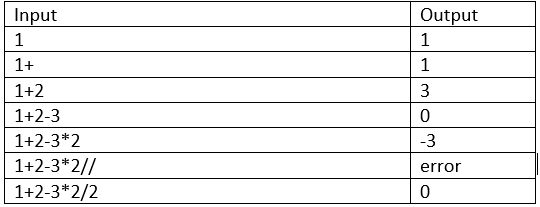

In [ ]:
class Node():
  def __init__(self, data):
    self.data = data
    self.next = None

class Stack():
  def __init__(self):
    self.front = None
    self.counter = 0

  def push(self, newval):
    new_node = Node(newval)
    if self.front == None:
      self.front = new_node
    else:
      new_node.next = self.front
      self.front = new_node
    self.counter += 1

  def pop(self):
    temp = self.front
    self.front = temp.next
    self.counter -= 1
    return temp.data



In [ ]:
def simple_calculator(expression):
    num_stack = []
    op_stack = []

    # Fungsi untuk menentukan prioritas operator
    def precedence(op):
        if op in ('+', '-'):
            return 1
        if op in ('*', '/'):
            return 2
        return 0

    # Fungsi untuk melakukan operasi antara dua angka
    def apply_operator(op):
        if len(num_stack) < 2:
            return "Error: Not enough operands"
        b = num_stack.pop()
        a = num_stack.pop()
        if op == '+':
            num_stack.append(a + b)
        elif op == '-':
            num_stack.append(a - b)
        elif op == '*':
            num_stack.append(a * b)
        elif op == '/':
            if b == 0:
                raise ValueError("Error: Division by zero")
            num_stack.append(a / b)

    i = 0
    while i < len(expression):
        if expression[i] == ' ':
            i += 1
            continue

        # Jika karakter adalah angka, masukkan ke stack angka
        if expression[i].isdigit():
            num = 0
            while i < len(expression) and expression[i].isdigit():
                num = num * 10 + int(expression[i])
                i += 1
            num_stack.append(num)
            i -= 1  # Step back after reading the full number

        # Jika karakter adalah operator
        elif expression[i] in ('+', '-', '*', '/'):
            # Jika operator ditemukan tanpa angka sebelumnya
            if not num_stack:
                return "Error: Operator without operand"
            while (op_stack and precedence(op_stack[-1]) >= precedence(expression[i])):
                apply_operator(op_stack.pop())
            op_stack.append(expression[i])

        else:
            return "Error: Invalid character"

        i += 1

    # Lakukan operasi untuk operator yang tersisa
    while op_stack:
        apply_operator(op_stack.pop())

    return num_stack[0] if num_stack else "Error"

def calculator():
    print("Step-by-step Calculator. Type 'exit' to quit.")
    while True:
        expression = input("Enter expression: ")
        if expression.lower() == "exit":
            break
        try:
            result = simple_calculator(expression)
            print(f"Output: {result}")
        except Exception as e:
            print(f"Error: {e}")

# Jalankan kalkulator
calculator()


Step-by-step Calculator. Type 'exit' to quit.
Enter expression: 1
Output: 1
Enter expression: +
Output: Error: Operator without operand
Enter expression: 1+
Output: 1
Enter expression: 1+2
Output: 3
Enter expression: 1+2-3
Output: 0
Enter expression: 1+2-3*2
Output: -3
Enter expression: 1+2-3*2//
Output: 0.5
Enter expression: 1+2-3*2/2
Output: 0.0
Enter expression: exit


# Latihan UTS 23/24

**REKURSI & LINKED LIST**
1. Buatlah sebuah fungsi rekursi untuk menghitung jumlah data yang ada di dalam sebuah linked list.
Tampilkan isi Single Linked List (Jangan gunakan double) dalam bentuk terbalik ( Reverse ) dari
belakang ke depan. Tampilkan 2 output, yaitu output jumlah dan output kurang.

Contoh :
*   Input : 1 → 3 → 4 → 7 (ISI LINKED LIST) // Output Jumlah : 7 + 4 + 3 + 1 = 15 // Output Kurang : 7 - 4 - 3 - 1 = -1
*   Input : 1 → 4 → 5 → 8 (ISI LINKED LIST) // Output Jumlah : 8 + 5 + 4 + 1 = 18 // Output Kurang : 8 - 5 - 4 - 1 = -2


In [38]:
class Node:
  def __init__(self, data):
    self.data = data
    self.next = None

class LinkedList:
  def __init__(self):
    self.front = None
    self.counter = 0

  def insert_list(self, newval):
    new_node = Node(newval)
    if (self.front == None):
      self.front = new_node
    else:
      temp = self.front
      while temp.next != None:
        temp = temp.next
      temp.next = new_node
    self.counter += 1

  def print(self):
    temp = self.front
    while temp != None:
      if temp.next != None:
        print(temp.data, end=" → ")
      else:
        print(temp.data)
      temp = temp.next

  def reversed(self):
    temp = self.front
    before = None
    while temp != None:
      after = temp.next
      temp.next = before
      before = temp
      temp = after
      if after == None:
          break
    self.front = before

  # RECURSIVE
  def sum(self, temp):
    if temp == None:
      return 0
    else:
      return self.sum(temp.next) + int(temp.data)

  def subtract(self, temp):
    if temp == None:
      return 0
    elif temp.next == None:
        return int(temp.data)
    else:
      return self.subtract(temp.next) - int(temp.data)

  def count_result(self):
    result_sum = self.sum(self.front)
    result_sub = self.subtract(self.front)
    self.reversed()

    # Sum
    print("Output Jumlah: ", end="")
    temp = self.front
    while temp != None:
      if temp.next == None:
        print(temp.data, "=", end = " ")
      else:
        print(temp.data, "+", end = " ")
      temp = temp.next
    print(result_sum)

    # Subtract
    print("Output Kurang: ", end=" ")
    temp = self.front
    while temp != None:
      if temp.next == None:
        print(temp.data, "=", end = " ")
      else:
        print(temp.data, "-", end = " ")
      temp = temp.next
    print(result_sub)


SLL = LinkedList()
elements = input("Input List: ").split()
for e in elements:
  SLL.insert_list(int(e))
print("Input: ", end=" ")
SLL.print()
SLL.count_result()

Input List: 1 3 4 7
Input:  1 → 3 → 4 → 7
Output Jumlah: 7 + 4 + 3 + 1 = 15
Output Kurang:  7 - 4 - 3 - 1 = -1


In [40]:
# JENNI'S VER

class Node:
  def __init__(self, data):
    self.data = data
    self.next = None

class SLL:
  def __init__(self):
    self.front = None
    self.counter = 0

  #tambah belakang
  def append(self, data):
    temp = self.front
    if(self.counter!=0):
      for i in range(self.counter-1):
        temp = temp.next
      temp.next = Node(data)
    else:
      self.front = Node(data)
    self.counter += 1

  #print
  def printSLL(self):
    if (self.counter!=0):
      temp = self.front
      for i in range(self.counter):
        print(temp.data, end=' --> ')
        if (temp.next==None):
          print('None')
        temp = temp.next

  #print reversed
  def printReversed(self, counter, operator):
    global hasil
    if (counter==0):
      print(hasil)
    else:
      temp = self.front
      for i in range(counter-1):
         temp = temp.next
      if(counter==1):
        print(temp.data, end=' = ')
      else:
        print(temp.data, operator, end=' ')
      if(operator=='+'):
        hasil+=temp.data
        self.printReversed(counter-1, '+')
      else:
        if (counter==self.counter):
          hasil = temp.data
        else:
          hasil -= temp.data
        self.printReversed(counter-1, '-')

sll = SLL()
sll.append(1)
sll.append(3)
sll.append(4)
sll.append(7)
sll.printSLL()
hasil = 0
sll.printReversed(sll.counter, '+')
hasil = 0
sll.printReversed(sll.counter, '-')

1 --> 3 --> 4 --> 7 --> None
7 + 4 + 3 + 1 = 15
7 - 4 - 3 - 1 = -1


**DOUBLE LINKED LIST**
2. Buatlah fungsi tambahan pada Double Linked List untuk membalik isi dari semua data.
*   Input : 1 → 3 → 4 → 7 (ISI LINKED LIST)
*   Output : 1 → 3 → 4 → 7
*   ~ Menjalankan Fungsi Balik ~
*   Output : 7 → 4 → 3 → 1
*   ~ Menjalankan Fungsi Balik ~
*   Output : 1 → 3 → 4 → 7

In [ ]:
class Node:
  def __init__(self, data):
    self.data = data
    self.next = None
    self.prev = None

class DoubleLL:
  def __init__(self):
    self.front = None
    self.back = None
    self.counter = 0

  def insert(self, newval):
    new_node = Node(newval)
    if self.front == None:
      self.front = new_node
      self.back = new_node
    else:
      self.back.next = new_node
      new_node.prev = self.back
      self.back = new_node
    self.counter += 1

  def reversed(self):
    temp = self.front
    before = None
    while temp != None:
      after = temp.next
      temp.next = before
      temp.prev = after
      before = temp
      temp = after
      if after == None:
          break
    self.front = before

  def print(self):
    temp = self.front
    while temp != None:
      if temp.next != None:
        print(temp.data, end=" → ")
      else:
        print(temp.data)
      temp = temp.next

DLL = DoubleLL()
elements = input("Input List: ").split()
for e in elements:
  DLL.insert(int(e))
print("Input: ", end = " ")
DLL.print()
print("Output: ", end = " ")
DLL.print()
print("~ Menjalankan Fungsi Balik ~")
DLL.reversed()
print("Output: ", end = " ")
DLL.print()
print("~ Menjalankan Fungsi Balik ~")
DLL.reversed()
print("Output: ", end = " ")
DLL.print()

Input List: 1 3 4 7
Input:  1 → 3 → 4 → 7
Output:  1 → 3 → 4 → 7
~ Menjalankan Fungsi Balik ~
Output:  7 → 4 → 3 → 1
~ Menjalankan Fungsi Balik ~
Output:  1 → 3 → 4 → 7


**STACK**
3. Buatlah aplikasi untuk menyimpan data pada sebuah stack utama. Data akan diurutkan (urut naik)
setiap kali memasukkan data baru. Mekanismenya, setiap ada data baru akan di push ke stack utama,
maka di cek terlebih dahulu isi stack utama. Jika data yang ada di dalam stack utama lebih besar dari
data baru maka isi stack akan dipindahkan ke stack sementara. Setelah itu data baru di push ke stack
utama dan semua isi stack sementara di push kembali ke stack utama.

In [16]:
class Node:
  def __init__(self, data):
    self.data = data
    self.next = None

class Stack:
  def __init__(self):
    self.top = None
    self.counter = 0

  # Push = Tambah Depan
  def push(self, newval):
    new_node = Node(newval)
    if (self.top == None):
      self.top = new_node
    else:
      new_node.next = self.top
      self.top = new_node
    self.counter += 1

  # Pop = Hapus Depan
  def pop(self):
    temp = self.top
    self.top = temp.next
    self.counter -= 1
    return temp.data

  # Sort
  def pushSort(self, newval):
    tempStack = Stack()
    new_node = Node(newval)
    if self.top is None and tempStack.top is None:
      self.top = new_node
    else:
      if new_node.data < self.top.data:
        new_node.next = self.top
        self.top = new_node
      else:
        # Dipindah ke stack sementara utk ke posisi yg diinginkan
        while self.top != None and new_node.data > self.top.data:
          tempStack.push(self.pop())
        # Udah sampe index yg di mau, insert data barunya
        new_node.next = self.top
        self.top = new_node
        # Kembaliin isi sebelumnya yg ada di stack sementara
        while tempStack.top != None:
          self.push(tempStack.pop())

  def print(self):
    temp = self.top
    while temp != None:
      if temp.next != None:
        print(temp.data, end=", ")
        temp = temp.next
      else:
        print(temp.data)
        break
    print()

Stack1 = Stack()
elements = input("Input List: ").split()
for e in elements:
  Stack1.pushSort(int(e))
print("Output: ", end = " ")
Stack1.print()


Input List: 1 5 4 2 8 9 7 3
Output:  1, 2, 3, 4, 5, 7, 8, 9



**QUEUE**
4. Modifikasilah class queue yang diberikan untuk bisa mengerjakan aplikasi berikut:
Queue akan menyimpan data object berisi nama barang (string) dan tanggal expired (Cdate)

  Universitas Kristen Petra Surabaya
  Fakultas Teknologi Industri
  Program Studi Informatika
  Aplikasi mempunyai menu untuk:
  *   Menambah data (data nama barang dan tanggal expired). Tidak perlu ada pengecekan terhadap
  tanggal, diasumsikan user menginputkan data dengan tanggal yang urut. (Isi queue urut
  berdasarkan tanggalnya)
  *   Fungsi untuk mengganti hari. Misal hari + 30 hari maka tanggal saat ini menjadi +30 hari.
  Asumsikan tanggal pertama kali adalah 11 Oktober 2023.
  *   Fungsi menghapus data barang yang sudah expired. Data pada queue yang tanggal expired nya
  sebelum atau sama dengan hari ini, di dequeue.


In [25]:
import datetime

class Node:
  def __init__(self, item, thn, bln, tgl):
    self.item = item
    self.date = datetime.date(thn, bln, tgl)
    self.next = None
    self.prev = None

class Queue:
  def __init__(self):
    self.front = None
    self.back = None
    self.counter = 0

  # Enqueue = Tambah Belakang
  def enqueue(self, newitem, newthn, newbln, newtgl):
    new_node = Node(newitem, newthn, newbln, newtgl)
    if self.front == None:
      self.front = new_node
      self.back = new_node
    else:
      self.back.next = new_node
      new_node.prev = self.back
      self.back = new_node
    self.counter += 1

  # Dequeue = Hapus index tertentu (Hapus tengah)
  def dequeue(self, index):
    if index == 1:
      temp = self.front
      self.front = temp.next
    else:
      temp = self.front
      for i in range(index-1):
        temp = temp.next
      before = temp.prev
      after = temp.next
      if before.next != None:
        before.next = after
      if after.prev != None:
        after.prev = before
    self.counter -= 1
    return temp.item

  # Mengganti hari
  def ubahHari(self, totalHari):
    firstDate = datetime.date(2024, 9, 26)
    today = firstDate + datetime.timedelta(days=totalHari)
    return today

  # Hapus item yg expired
  def hapusExpired(self, today):
    temp = self.front
    index = 1
    while temp != None:
      if temp.date <= today:
        self.dequeue(index)
      else:
        index += 1
      temp = temp.next

  def print_queue(self):
    temp = self.front
    while temp != None:
      print(temp.item, temp.date)
      temp = temp.next


queue1 = Queue()
n = int(input("Masukkan jumlah item: "))
print()
for i in range(n):
  nama = input("Masukkan nama item: ")
  thn = int(input("Masukkan tahun expired: "))
  bln = int(input("Masukkan bulan expired: "))
  tgl = int(input("Masukkan tanggal expired: "))
  print()
  queue1.enqueue(nama, thn, bln, tgl)
print("===========================================")
queue1.print_queue()
print("===========================================")
totalHari = int(input("Masukkan jumlah hari utk mengubah tanggal: "))
today = queue1.ubahHari(totalHari)
print("Tanggal hari ini = ", today)
print("===========================================")
print("Item yang belum melewati batas expired: ")
queue1.hapusExpired(today)
queue1.print_queue()

Masukkan jumlah item: 5

Masukkan nama item: in
Masukkan tahun expired: 2024
Masukkan bulan expired: 9
Masukkan tanggal expired: 26

Masukkan nama item: sam
Masukkan tahun expired: 2024
Masukkan bulan expired: 9
Masukkan tanggal expired: 28

Masukkan nama item: mo
Masukkan tahun expired: 2024
Masukkan bulan expired: 10
Masukkan tanggal expired: 3

Masukkan nama item: ich
Masukkan tahun expired: 2024
Masukkan bulan expired: 10
Masukkan tanggal expired: 6

Masukkan nama item: no
Masukkan tahun expired: 2024
Masukkan bulan expired: 10
Masukkan tanggal expired: 15

in 2024-09-26
sam 2024-09-28
mo 2024-10-03
ich 2024-10-06
no 2024-10-15
Masukkan jumlah hari utk mengubah tanggal: 6
Tanggal hari ini =  2024-10-02
Item yang belum melewati batas expired: 
mo 2024-10-03
ich 2024-10-06
no 2024-10-15


# Latihan UTS kls sblh

1. Buatlah Program untuk mengubah dari infiks
menjadi prefiks (wajib untuk menggunakan stack / queue / keduanya)

In [2]:
# INFIX --> PREFIX (stack)

class Node:
  def __init__(self, data):
    self.data = data
    self.next = None

class Stack:
  def __init__(self):
    self.top = None
    self.counter = 0

  def push(self, newval):
    new_node = Node(newval)
    if (self.top == None):
      self.top = new_node
    else:
      new_node.next = self.top
      self.top = new_node
    self.counter += 1

  def pop(self):
    if self.top == None:
      return None
    temp = self.top
    self.top = temp.next
    self.counter -= 1
    return temp.data

  def print(self):
    temp = self.top
    while temp != None:
      print(temp.data)
      temp = temp.next


def hirarkiOperator(op):
  if op == '+' or op == '-':
    return 1
  elif op == '*' or op == '/':
    return 2
  elif op == '^':
    return 3
  return 0

def infixToPostfix(infix):
  postfix = ""
  temp_stack = []

  for i in range(len(infix)):
    x = infix[i]
    if x.isdigit() or x.isalpha():
      postfix += x

    elif x == '(':
      temp_stack.append(x)
        # "(" sementara dipindah ke stack, sbg pembatas operator dalam kurung
        # operand ttp dimasukkin ke postfix lgsg

    elif x == ')':
      # kalau ketemu penutup kurungnya, operator yg di stack dipindah ke postfix sampai batas kurung buka
      while temp_stack[-1] != '(':
        postfix += temp_stack.pop()
    # kalo uda ketemu "(", gausa dimasukkin ke postfix
      temp_stack.pop()

    elif x in '+-*/^':
      if(len(temp_stack) <= 0) or (hirarkiOperator(x) > hirarkiOperator(temp_stack[-1])):
        temp_stack.append(x)
      elif hirarkiOperator(x) < hirarkiOperator(temp_stack[-1]):
        while hirarkiOperator(x) < hirarkiOperator(temp_stack[-1]):
          postfix += temp_stack.pop()
        temp_stack.append(x)
      else:
        if x == '^':
            temp_stack.append(x)
        else:
            postfix += temp_stack.pop()
            temp_stack.append(x)

  while len(temp_stack) > 0:
    postfix += temp_stack.pop()

  return postfix

# Reverse
def reverse(infix):
  # Reverse infixnya
  infix = infix[::-1]
  reversed = ""
  for x in infix:
    if x == '(':
      reversed += ')'
    elif x == ')':
      reversed += '('
    else:
      reversed += x
  return reversed



# MAIN
infix = input("Input infix yang ingin diubah menjadi prefix: ")
# Infix hrs dibalik dulu
infix = reverse(infix)
# Cari postfixnya
postfix = infixToPostfix(infix)
# Dari hasil postfix dibalik lg utk mendapatkan hasil prefix
prefix = reverse(postfix)
print("Hasil prefix: ", prefix)



Input infix yang ingin diubah menjadi prefix:  x+y*z/w+u
Hasil prefix:  ++x*y/zwu


2. Buatlah Program untuk mengubah dari infiks
menjadi postfiks (wajib untuk
menggunakan stack / queue / keduanya)

In [9]:
class Node:
  def __init__(self, data):
    self.data = data
    self.next = None

class Stack:
  def __init__(self):
    self.top = None
    self.counter = 0

  def push(self, newval):
    new_node = Node(newval)
    if self.top == None:
      self.top = new_node
    else:
      new_node.next = self.top
      self.top = new_node
    self.counter += 1

  def pop(self):
    if self.top == None:
      return None
    temp = self.top
    self.top = temp.next
    self.counter -= 1
    return temp.data

  def print(self):
    temp = self.top
    while temp != None:
      print(temp.data)
      temp = temp.next

def hirarkiOperator(op):
  if op == '+' or op == '-':
    return 1
  elif op == '*' or op == '/':
    return 2
  elif op == '^':
    return 3
  return 0

def infixToPostfix(infix):
  postfix = ""
  stack = Stack()

  for i in range(len(infix)):
    x = infix[i]
    if x.isdigit() or x.isalpha():
      postfix += x

    elif x == '(':
      stack.push(x)
      # "(" sementara dipindah ke stack, sbg pembatas operator dalam kurung
      # operand ttp dimasukkin ke postfix lgsg

    elif x == ')':
      while stack.top.data != '(':
        # kalau ketemu penutup kurungnya, operator yg di stack dipindah ke postfix sampai batas kurung buka
        postfix += stack.pop()
        # kalo uda ketemu "(", gausa dimasukkin ke postfix
      stack.pop()     # utk menghapus '('

    elif x in "+-*/^":
      if (stack.top == None) or (hirarkiOperator(x) > hirarkiOperator(stack.top.data)):
        stack.push(x)
      elif (hirarkiOperator(x) <= hirarkiOperator(stack.top.data)):
        while (stack.counter != 0 and hirarkiOperator(x) <= hirarkiOperator(stack.top.data)):
          postfix += stack.pop()
        stack.push(x)

  while stack.counter > 0:
    postfix += stack.pop()

  return postfix

# MAIN
infix = input("Input infix yang ingin diubah menjadi postfix: ")
postfix = infixToPostfix(infix)
print("Hasil postfix: ", postfix)


Input infix yang ingin diubah menjadi postfix: A/(B-C)*D+E
Hasil postfix:  ABC-/D*E+


3. Buatlah Program untuk menghitung sebuah
postfiks (wajib untuk
menggunakan stack / queue / keduanya)

In [15]:
class Node:
  def __init__(self, data):
    self.data = data
    self.next = None

class Stack:
  def __init__(self):
    self.top = None
    self.counter = 0

  def push(self, newval):
    new_node = Node(newval)
    if self.top == None:
      self.top = new_node
    else:
      new_node.next = self.top
      self.top = new_node
    self.counter += 1

  def pop(self):
    if self.top == None:
      return None
    temp = self.top
    self.top = temp.next
    self.counter -= 1
    return temp.data

  def print(self):
    temp = self.top
    while temp != None:
      print(temp.data)
      temp = temp.next

# MAIN
postfix = input("Silahkan ketik ekspresi postfix dipisahkan dengan spasi(e.g. 3 2 +): ")
postfix = postfix.split()
stack = Stack()

# Count Operation
for x in postfix:
  if x.isdigit():
    stack.push(int(x))

  elif x in "+-*/^":
    if stack.counter >= 2:
      second = stack.pop()
      first = stack.pop()
      result = 0
      if x == '+':
        result = first + second
      elif x == '-':
        result = first - second
      elif x == '*':
        result = first * second
      elif x == '/':
        result = first / second
      elif x == '^':
        result = first ** second
      stack.push(result)
    else:
      print("Lacking operand. Please enter a correct equation. Program ends.")
      break

  else:
    print("Please input a valid postfix")
    break

if stack.counter == 1:  # mendapatkan hasilnya
  print("Hasil = ", result)



Silahkan ketik ekspresi postfix dipisahkan dengan spasi(e.g. 3 2 +): 5 1 2 + 4 * + 3 -
Hasil =  14


4. Buatlah sebuah program untuk playlist musik,
dimana yang diinputkan adalah judul lagu, penyanyi
dan lagunya. Fungsi yang ada untuk playlist tersebut
adalah :
*   Add Song
*   Next Song
*   Prev Song
*   Full Repeat (apabila playlist sudah habis, kembali ke lagu yang awal)

In [19]:
class Node:
  def __init__(self, title, singer):
    self.title = title
    self.singer = singer
    self.next = None
    self.prev = None

class Queue:
  def __init__(self):
    self.front = None
    self.back = None
    self.current = None
    self.counter = 0

  # Enqueue = Tambah Belakang
  def addSong(self, newTitle, newSinger):
    new_song = Node(newTitle, newSinger)
    if self.front == None:
      self.front = new_song
      self.back = new_song
      self.current = new_song
      new_song.next = new_song  # Circular
      new_song.prev = new_song  # Circular
    else:
      self.back.next = new_song
      new_song.prev = self.back
      self.back = new_song
      self.back.next = self.front   # Circular
      self.front.prev = self.back   # Circular
    self.counter += 1

  def nextSong(self):
    if self.current == None:
      self.current = self.front
    else:
      self.current = self.current.next
    self.showCurrentSong()

  def prevSong(self):
    if self.current == None:
      self.current = self.back
    else:
      self.current = self.current.prev
    self.showCurrentSong()

  def showCurrentSong(self):
    if self.current == None:
      print("Playlist is empty")
    else:
      print("Now Playing...")
      print("Song title: ", self.current.title)
      print("Singer: ", self.current.singer)
      print()

  def showAllSongs(self):
    print("All songs in the playlist: ")
    temp = self.front
    while temp != None:
      print(temp.title, " - ", temp.singer)
      temp = temp.next
      if temp == self.front:
        break
    print()


# MAIN
queue = Queue()
while True:
  print("======== Playlist Menu ========")
  print("1. Add Song")
  print("2. Next Song")
  print("3. Prev Song")
  print("4. Current Song")
  print("5. Show all Songs")
  print("0. Exit")
  menu = input("Choose menu: ")

  if menu == '0':
    print("Exiting playlist...")
    break

  elif menu == '1':
    title = input("Enter title: ")
    singer = input("Enter singer: ")
    queue.addSong(title, singer)

  elif menu == '2':
    queue.nextSong()

  elif menu == '3':
    queue.prevSong()

  elif menu == '4':
    queue.showCurrentSong()

  elif menu == '5':
    queue.showAllSongs()

  else:
    print("Invalid menu. Please try again.")

  print()



======== Playlist Menu ========
1. Add Song
2. Next Song
3. Prev Song
4. Current Song
5. Show all Songs
0. Exit
Choose menu: 1
Enter title: me
Enter singer: TS

======== Playlist Menu ========
1. Add Song
2. Next Song
3. Prev Song
4. Current Song
5. Show all Songs
0. Exit
Choose menu: 1
Enter title: you!
Enter singer: LANY

======== Playlist Menu ========
1. Add Song
2. Next Song
3. Prev Song
4. Current Song
5. Show all Songs
0. Exit
Choose menu: 1
Enter title: 8 letters
Enter singer: WDW

======== Playlist Menu ========
1. Add Song
2. Next Song
3. Prev Song
4. Current Song
5. Show all Songs
0. Exit
Choose menu: 5
All songs in the playlist: 
me  -  TS
you!  -  LANY
8 letters  -  WDW

======== Playlist Menu ========
1. Add Song
2. Next Song
3. Prev Song
4. Current Song
5. Show all Songs
0. Exit
Choose menu: 4
Now Playing...
Song title:  me
Singer:  TS

======== Playlist Menu ========
1. Add Song
2. Next Song
3. Prev Song
4. Current Song
5. Show all Songs
0. Exit
Choose menu: 2
Now Playi

5. Buatlah sebuah fungsi rekursi untuk kasus di
bawah ini (Hasil perlu disimpan ke dalam sebuah
Linked List)

  Contoh :
  *   n=4 ==> Output : 4 8 2 8
  *   n=7 ==>Output:7 14 4 16 3 18 2

In [45]:
class Node:
  def __init__(self, data):
    self.data = data
    self.next = None

class LinkedList:
  def __init__(self):
    self.front = None

  # Tambah belakang
  def insert(self, newval):
    new_node = Node(newval)
    if self.front == None:
      self.front = new_node
    else:
      temp = self.front
      while temp.next != None:
        temp = temp.next
      temp.next = new_node

  def print(self):
    temp = self.front
    while temp != None:
      print(temp.data)
      temp = temp.next


# Rekursif
def rekursi(n, LL, n_ori):
  if n == 1:
    LL.insert(n_ori)
    return n_ori

  hasil = 0
  if (n % 2 == 0):
    hasil = rekursi(n-1, LL, n_ori) * n
  else:
    hasil = rekursi(n-1, LL, n_ori) // n

  LL.insert(hasil)
  return hasil


LL = LinkedList()
n = int(input("Input n: "))
rekursi(n, LL, n)
LL.print()


Input n: 7
7
14
4
16
3
18
2


In [36]:
# SHELLY'S VER
# NO 5 fungsi rekursi
# 5. Buatlah sebuah fungsi rekursi untuk kasus di bawah ini (Hasil perlu disimpan ke dalam sebuah Linked List)
# Contoh :
# n=4 ==> Output : 4  8  2  8
# n=7 ==> Output : 7  14   4   16   3   18   2

class LinkedList:
  def __init__(self):
    self.front = None

  def add(self, newval):
    new_node = Node(newval)
    if self.front == None:
      self.front = new_node
    else:
      new_node.next = self.front
      self.front = new_node

  def print(self):
    temp = self.front
    while temp != None:
      print(temp.data)
      temp = temp.next

def pola(n, attempts, max, sll):
  if attempts-1 == max:
    return

  if (attempts % 2 == 0):
    sll.add(n*attempts)
    pola(n*attempts, attempts+1, max, sll)
  else:
    sll.add(n//attempts)
    pola(n//attempts, attempts+1, max, sll)

n = int(input("Masukkan n: "))
sll = LinkedList()
pola(n, 1, n, sll)
sll.print()

Masukkan n: 7
2
18
3
16
4
14
7


In [25]:
class Node:
  def __init__(self, data):
    self.data = data
    self.next = None

class LinkedList:
  def __init__(self):
    self.front = None

  def insert(self, newval):
    new_node = Node(newval)
    if self.front == None:
      self.front = new_node
    else:
      new_node.next = self.front
      self.front = new_node

  # Rekursif
  def rekursi(self, n):
    if n <= 1:
      self.insert(n)
      return
    elif n % 2 == 0:
      self.insert(int(n) * self.rekursi(n-1))
    else:
     self.insert(int(n) // self.rekursi(n-1))

  def print(self):
    temp = self.front
    while temp != None:
      print(temp.data)
      temp = temp.next

LL = LinkedList()
n = int(input("input n: "))
LL.rekursi(n)
LL.print()


input n: 7


TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'